# Data understanding 
#### 1. There are 111 columns and 39717 rows
#### 2. The size of the dataframe is 4408587 
#### 3. There are 74 columns of datatype float64, 13 columns of datatype int64 and 24 columns of datatype object
#### 4. There are 87 continous columns.
#### 5. Continous variables:
cont_var = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','issue_d','url','dti','earliest_cr_line','revol_bal','revol_util','out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

#### 6. Categorical Variables:

cat_var = ['grade','sub_grade','emp_tile','emp_length','home_ownership','verification_status','loan_status','purpose','zip_code','addr_state','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','application_type','pub_rec_bankruptcies']

# Data Cleaning and Manipulation

#### 7. null_column_list - gives the list of columns that has only null values - i.e., 54 columns.
#### 8. columns_50_missing_values - gives the list of columns that has more than 50% null values- i.e., 3 columns.
#### 9. Some of the columns doesnot add any value for the investigation : no_value_column i.e., 9 columns
#### 10. The columns title and purpose have the same data but title is not in organized way.
#### 11. Some of the columns have nulls which can be imputed with mean or medians 
#### 12. The emp_title columns has same tiles repeating but with slight difference we will generalize them for the records having higher counts
#### 13. Create new columns with for time series columns with month and year
#### 14. The columns last_credit_pull_d and last_pymnt_d had null values due to which the date convertion functions were showing as float so dropped the null columns to help with analysis.
#### 15. There are outliers for cont_var columns -- need to work on dropping them


# Import the libraries

In [746]:
import pandas as pd # pandas library helps in data analysis and manipulation
import numpy as np # numpy library provides functions for mathematical operations and large, multi-dimensional arrays and matrices
import seaborn as sns # library for data visualization more advanced than matplotlib
import warnings # library shows warning messages
warnings.simplefilter("ignore") # to ignore any warning messages during the execution of the code
import matplotlib.pyplot as plt # library for data visualization
%matplotlib inline # one of the magic fuction that ensures that the graphs/plots are displayed just below the cell calling it.

## Create a datafram from the csv file

In [747]:
# read the loan.csv using pandas 
df = pd.read_csv('loan.csv')

## Understand the dataframe

In [748]:
# get the top 5 rows of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [749]:
# check the no of rows and columns in the dataframe
df.shape

(39717, 111)

In [750]:
# check the size of the dataframe
df.size

4408587

In [751]:
# check the different columns datatypes in the dataframe.
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [752]:
# print the concise summary of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [485]:
# get the data distribution of the dataframe.
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [824]:
# Get the column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [753]:
### continous variable
cont_var = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','issue_d','url','dti','earliest_cr_line','revol_bal','revol_util','out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [754]:
### Categorical variable
cat_var = ['grade','sub_grade','emp_tile','emp_length','home_ownership','verification_status','loan_status','purpose','zip_code','addr_state','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','pub_rec_bankruptcies']

# Data cleaning

## 1. Check for null columns

In [755]:
# check the sum of rows for the columns having nulls
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Delete the columns where the null values are equal to the no of rows

In [756]:
# creating a list of columns where null values are found for all the rows that are there in the dataframe.
null_column_list = [i for i in df.columns if df[i].isnull().sum()==39717 ]

In [757]:
# display the null columns 
null_column_list

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [758]:
# check the total no of columns having nulls.

len(null_column_list)

54

## Create a new dataframe where we are removing all the null columns

In [759]:
# drop the columns having null and store it in new dataframe.
df_new = df.drop(null_column_list,axis=1)

In [760]:
# check the top 5 rows of the new dataframe.
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [761]:
# check the no of rows and columns in the new dataframe.
# We can see that the new dataframe has 54 columns less than the original dataframe.
df_new.shape

(39717, 57)

In [762]:
# check the size of the new dataframe.
# We can see the size of the new dataframe has reduced. 
df_new.size

2263869

In [763]:
# check the sum of no of null rows in the all the columns in the new dataframe.
df_new.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [826]:
# get the details about the data distribution for the 3 columns where there are more than 50% missing values.

In [839]:
# get the list of columns where there are more than 50% missing values.
# we see that there are 3 columns where there are more than 50% of missing values
columns_50_missing_values = [x for x in df_new.columns if df_new[x].isnull().sum()/df_new.shape[0]*100 > 50 ]
columns_50_missing_values

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [838]:
# Check the data across the 3 columns like unique values,count of each value and distribution of data.
for i in columns_50_missing_values:
    print("Unique values for the column",i, df_new[i].unique())
    print("Value counts for the column",i,df_new[i].value_counts())
    print("distribution of the data for the column", i, df_new[i].describe())

Unique values for the column mths_since_last_delinq [ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
Value counts for the column mths_since_last_delinq 0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
distribution of the data for the column mths_since_last_delinq count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.0

## We still see a large no of columns where we have huge null values.
### We will clean up the columns where there are more than 50% of null values as we cannot impute them.

In [845]:
# dropping the columns where there a more than 50% missing value and create new dataframe from it.
df_new1= df_new.drop(columns_50_missing_values,axis=1)

In [771]:
# get the top 5 rows of the new dataframe
df_new1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [772]:
# get the size of the new dataframe
# we see that the size of the dataframe has further reduced.
df_new1.size

2144718

In [773]:
# get the shape of the new dataframe. 
# we see that the no of columns have reduced.
df_new1.shape

(39717, 54)

In [774]:
#Check the datatype of the new dataframe.
df_new1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [775]:
# check for the sum of null rows for the new dataframe.
df_new1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

## 2. Check for any duplicates

In [840]:
# check if there are any duplicate columns in the dataframe.
df_new1[df_new1.duplicated(keep='first')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


# 3. Check for columns where nulls can be imputed with mean or medians

In [777]:
# check the count of value for pub_rec_bankruptcies column.
df_new1.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [841]:
# check the distribution of value in pub_rec_bankruptcies column.
df_new1.pub_rec_bankruptcies.describe()

count    39717.000000
mean         0.042501
std          0.202603
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [846]:
# impute meadian value for pub_rec_bankruptcie as the 1 and 3rd qartlie and median all are 0.
df_new1.pub_rec_bankruptcies= df_new1.pub_rec_bankruptcies.fillna(0)

In [847]:
# get the value count post imputing the values for pub_rec_bankruptcies
df_new1.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [848]:
# check the count of value for tax_liens column.
df_new1.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [849]:
# check the unique values for tax_liens
df_new1.tax_liens.unique()

array([ 0., nan])

In [858]:
# since there are only 0 and nan values fill the nan with 0.
df_new1.tax_liens = df_new1.tax_liens.fillna(0)

In [850]:
# check the unique values for chargeoff_within_12_mths
df_new1.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [851]:
# check the count of value for chargeoff_within_12_mths column.
df_new1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [852]:
# since there are only 0 and nan values fill the nan with 0.
df_new1.chargeoff_within_12_mths = df_new1.chargeoff_within_12_mths.fillna(0)

In [855]:
# check the unique values for collections_12_mths_ex_med
df_new1.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [854]:
# check the count of value for collections_12_mths_ex_med column.
df_new1.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [856]:
# since there are only 0 and nan values fill the nan with 0.
df_new1.collections_12_mths_ex_med=df_new1.collections_12_mths_ex_med.fillna(0)

In [861]:
# check the sum of null rows for all the columns
df_new1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [863]:
# check count of values for last_credit_pull_d
df_new1.last_credit_pull_d.value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [864]:
# check the rows where the last_credit_pull_d is null
df_new1[df_new1.last_credit_pull_d.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,575712,740467,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,...,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,186499,186347,1000,1000,875.0,36 months,7.12%,30.94,A,A1,...,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [865]:
# check the column names if any that might help us in imputing the last_credit_pull_d 
df_new1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [866]:
# check if any of the date columns can help
df_new1[df_new1.last_credit_pull_d.isnull()][['issue_d','last_pymnt_d','last_credit_pull_d','term','loan_status']]

,issue_d,last_pymnt_d,last_credit_pull_d,term,loan_status
26025,Sep-10,Jun-12,NaN,36 months,Charged Off
39476,Dec-07,Aug-10,NaN,36 months,Fully Paid


In [802]:
# check if there is any trend that can be used by inspecting top 5 rows.
df_new1[['issue_d','last_pymnt_d','last_credit_pull_d','term','loan_status']].head()

,issue_d,last_pymnt_d,last_credit_pull_d,term,loan_status
0,Dec-11,Jan-15,May-16,36 months,Fully Paid
1,Dec-11,Apr-13,Sep-13,60 months,Charged Off
2,Dec-11,Jun-14,May-16,36 months,Fully Paid
3,Dec-11,Jan-15,Apr-16,36 months,Fully Paid
4,Dec-11,May-16,May-16,60 months,Current


In [867]:
# check if there is any trend that can be used by inspecting bottom 5 rows.
# dint find any trend as the last_credit_pull_d can be exactly same as the total no of term months or it can exceed that as well or sometimes it can be same. Will need more data to derive something. 
df_new1[['issue_d','last_pymnt_d','last_credit_pull_d','term','loan_status']].tail()

,issue_d,last_pymnt_d,last_credit_pull_d,term,loan_status
39712,Jul-07,Jul-10,Jun-10,36 months,Fully Paid
39713,Jul-07,Jul-10,Jul-10,36 months,Fully Paid
39714,Jul-07,Apr-08,Jun-07,36 months,Fully Paid
39715,Jul-07,Jan-08,Jun-07,36 months,Fully Paid
39716,Jun-07,Jun-10,Jun-10,36 months,Fully Paid


In [874]:
# check the top 5 null row details for last_pymnt_d column
df_new1[df_new1.last_pymnt_d.isnull()].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26,1069800,1304679,15000,15000,8725.0,36 months,14.27%,514.64,C,C2,...,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2724,1032519,1262161,8000,8000,3975.0,36 months,14.65%,275.96,C,C3,...,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3613,1016039,1243723,6400,6400,6400.0,60 months,18.25%,163.39,D,D5,...,0.0,Apr-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3985,1009833,1236591,18000,18000,18000.0,60 months,19.03%,467.23,E,E2,...,0.0,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4206,1006579,1232989,1800,1800,1800.0,36 months,8.90%,57.16,A,A5,...,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [878]:
# Check the top 30 see if we can derive the last_pymnt_d value from any of the date columns and term column
df_new1[df_new1.last_pymnt_d.isnull()][['issue_d','last_pymnt_d','last_credit_pull_d','term','loan_status']].head(30)

,issue_d,last_pymnt_d,last_credit_pull_d,term,loan_status
26,Dec-11,NaN,May-16,36 months,Charged Off
2724,Nov-11,NaN,May-16,36 months,Charged Off
3613,Nov-11,NaN,Apr-12,60 months,Charged Off
3985,Nov-11,NaN,Apr-16,60 months,Charged Off
4206,Nov-11,NaN,May-16,36 months,Charged Off
4803,Oct-11,NaN,Apr-12,36 months,Charged Off
5716,Oct-11,NaN,Mar-12,36 months,Charged Off
6253,Oct-11,NaN,Sep-15,36 months,Charged Off
6259,Oct-11,NaN,Mar-12,60 months,Charged Off
6768,Sep-11,NaN,Mar-12,60 months,Charged Off


In [879]:
# check the tail 45 rows to see if we can derive the last_pymnt_d value from any of the date columns and term column
# it is observed that the last_pymnt_d is null for Charged Off loan status only. So in conclusion looks like we dont know exactly when the last payment was done.
# and the loan was not payed in full within the term. 

df_new1[df_new1.last_pymnt_d.isnull()][['issue_d','last_pymnt_d','last_credit_pull_d','term','loan_status']].tail(45)

,issue_d,last_pymnt_d,last_credit_pull_d,term,loan_status
14220,May-11,NaN,May-16,36 months,Charged Off
14642,May-11,NaN,May-16,36 months,Charged Off
14839,May-11,NaN,May-16,36 months,Charged Off
14871,May-11,NaN,Nov-11,36 months,Charged Off
16301,Apr-11,NaN,May-16,36 months,Charged Off
16325,Apr-11,NaN,Oct-11,36 months,Charged Off
16719,Apr-11,NaN,May-11,60 months,Charged Off
17913,Mar-11,NaN,Jul-15,36 months,Charged Off
18037,Mar-11,NaN,Aug-11,60 months,Charged Off
18216,Mar-11,NaN,Sep-11,60 months,Charged Off


In [135]:
# check the count of values in tile column
df_new1.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [136]:
# check the count of values in purpose column
# Both title and purpose looks similar. However purpose gives better categories than title as title is organized and have clear distinction.
df_new1.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

## Since title and purpose looks same but have small or short names for it will remove the title column

In [871]:
# drop the title column as it is duplicate of purpose. 
df_new1.drop('title',axis=1,inplace=True)

In [872]:
# check the null rows sum for all columns
df_new1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [885]:
# renaming emp_length for better understanding to emp_experience

df_new1.rename(columns={'emp_length':'emp_experience'},inplace=True)

In [887]:
# Get the value counts for the employee work experience

df_new1.emp_experience.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_experience, dtype: int64

In [896]:
df_new1.emp_experience.str.split(" ",expand=True)

,0,1,2
0,10+,years,None
1,<,1,year
2,10+,years,None
3,10+,years,None
4,1,year,None
...,...,...,...
39712,4,years,None
39713,3,years,None
39714,<,1,year
39715,<,1,year


Text(0, 0.5, 'No of employees')

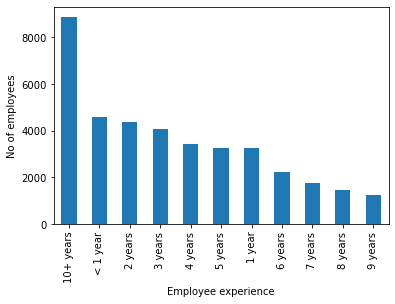

In [891]:
df_new1.emp_experience.value_counts().plot.bar()
plt.xlabel("Employee experience")
plt.ylabel("No of employees")

In [133]:
# inspect the revol_util column to get the count of values.
df_new1.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [140]:
df_new1.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [141]:
df_new1.emp_title.value_counts().head(30)

US Army                    134
Bank of America            109
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
USAF                        54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   41
Verizon Wireless            40
Self Employed               40
USPS                        39
US ARMY                     39
Walgreens                   38
JP Morgan Chase             37
JPMorgan Chase              36
Department of Defense       36
Target                      35
US Navy                     35
Self                        35
Booz Allen Hamilton         34
Northrop Grumman            34
United States Army          33
Verizon                     33
Best Buy                    32
Name: emp_title, dtype: int64

## We see that the emp_title has same tiles repeating but with slight difference we will generalize them

In [240]:
df_new1.emp_title = df_new1['emp_title'].replace(['USAF'],'US Air Force')

In [143]:
df_new1.emp_title.value_counts().head(30)

US Army                    134
Bank of America            109
US Air Force               106
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
UPS                         53
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   41
Verizon Wireless            40
Self Employed               40
US ARMY                     39
USPS                        39
Walgreens                   38
JP Morgan Chase             37
Department of Defense       36
JPMorgan Chase              36
Target                      35
US Navy                     35
Self                        35
Booz Allen Hamilton         34
Northrop Grumman            34
United States Army          33
Verizon                     33
Best Buy                    32
Comcast                     31
Name: emp_title, dtype: int64

In [241]:
df_new1.emp_title = df_new1['emp_title'].replace(['U.S. Army','US ARMY'],'US Army')

In [145]:
df_new1.emp_title.value_counts().head(30)

US Army                    214
Bank of America            109
US Air Force               106
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
UPS                         53
Walmart                     45
Lockheed Martin             44
State of California         42
United States Air Force     42
Verizon Wireless            40
Self Employed               40
USPS                        39
Walgreens                   38
JP Morgan Chase             37
Department of Defense       36
JPMorgan Chase              36
Self                        35
US Navy                     35
Target                      35
Northrop Grumman            34
Booz Allen Hamilton         34
United States Army          33
Verizon                     33
Best Buy                    32
Comcast                     31
us army                     30
Fidelity Investments        30
Name: emp_title, dtype: int64

In [242]:
df_new1.emp_title = df_new1['emp_title'].replace(['United States Air Force'],'US Air Force')

In [243]:
df_new1.emp_title = df_new1['emp_title'].replace(['United States Army','us army'],'US Army')

In [148]:
df_new1.emp_title.value_counts().head(30)

US Army                  277
US Air Force             148
Bank of America          109
IBM                       66
AT&T                      59
Kaiser Permanente         56
Wells Fargo               54
UPS                       53
Walmart                   45
Lockheed Martin           44
State of California       42
Verizon Wireless          40
Self Employed             40
USPS                      39
Walgreens                 38
JP Morgan Chase           37
Department of Defense     36
JPMorgan Chase            36
Target                    35
Self                      35
US Navy                   35
Booz Allen Hamilton       34
Northrop Grumman          34
Verizon                   33
Best Buy                  32
Comcast                   31
Accenture                 30
Fidelity Investments      30
United Parcel Service     28
Home Depot                27
Name: emp_title, dtype: int64

In [244]:
df_new1.emp_title = df_new1['emp_title'].replace(['JP Morgan Chase'],'JPMorgan Chase')

In [150]:
df_new1.emp_title.value_counts().head(30)

US Army                         277
US Air Force                    148
Bank of America                 109
JPMorgan Chase                   73
IBM                              66
AT&T                             59
Kaiser Permanente                56
Wells Fargo                      54
UPS                              53
Walmart                          45
Lockheed Martin                  44
State of California              42
Verizon Wireless                 40
Self Employed                    40
USPS                             39
Walgreens                        38
Department of Defense            36
Target                           35
US Navy                          35
Self                             35
Northrop Grumman                 34
Booz Allen Hamilton              34
Verizon                          33
Best Buy                         32
Comcast                          31
Accenture                        30
Fidelity Investments             30
United Parcel Service       

In [245]:
df_new1.emp_title = df_new1['emp_title'].replace(['UPS'],'United Parcel Service')

In [152]:
df_new1.emp_title.value_counts().head(30)

US Army                           277
US Air Force                      148
Bank of America                   109
United Parcel Service              81
JPMorgan Chase                     73
IBM                                66
AT&T                               59
Kaiser Permanente                  56
Wells Fargo                        54
Walmart                            45
Lockheed Martin                    44
State of California                42
Verizon Wireless                   40
Self Employed                      40
USPS                               39
Walgreens                          38
Department of Defense              36
Target                             35
Self                               35
US Navy                            35
Northrop Grumman                   34
Booz Allen Hamilton                34
Verizon                            33
Best Buy                           32
Comcast                            31
Accenture                          30
Fidelity Inv

In [246]:
df_new1.emp_title = df_new1['emp_title'].replace(['USPS','United States Postal Service'],'US Postal Service')

In [154]:
df_new1.emp_title.value_counts().head(30)

US Army                           277
US Air Force                      148
Bank of America                   109
US Postal Service                  91
United Parcel Service              81
JPMorgan Chase                     73
IBM                                66
AT&T                               59
Kaiser Permanente                  56
Wells Fargo                        54
Walmart                            45
Lockheed Martin                    44
State of California                42
Verizon Wireless                   40
Self Employed                      40
Walgreens                          38
Department of Defense              36
US Navy                            35
Self                               35
Target                             35
Northrop Grumman                   34
Booz Allen Hamilton                34
Verizon                            33
Best Buy                           32
Comcast                            31
Fidelity Investments               30
Accenture   

In [247]:
df_new1.emp_title = df_new1['emp_title'].replace(['Wells Fargo Bank'],'Wells Fargo')

In [248]:
df_new1.emp_title = df_new1['emp_title'].replace(['Verizon Wireless'],'Verizon')

In [75]:
df_new1.emp_title.value_counts().head(30)

US Army                           277
US Air Force                      148
Bank of America                   109
US Postal Service                  91
United Parcel Service              81
Wells Fargo                        79
JPMorgan Chase                     73
Verizon                            73
IBM                                66
AT&T                               59
Kaiser Permanente                  56
Walmart                            45
Lockheed Martin                    44
State of California                42
Self Employed                      40
Walgreens                          38
Department of Defense              36
Target                             35
US Navy                            35
Self                               35
Northrop Grumman                   34
Booz Allen Hamilton                34
Best Buy                           32
Comcast                            31
Fidelity Investments               30
Accenture                          30
Home Depot  

In [249]:
df_new1.emp_title = df_new1['emp_title'].replace(['walmart'],'Walmart')

In [250]:
df_new1.emp_title = df_new1['emp_title'].replace(['self','Self'],'Self Employed')

In [79]:
df_new1.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
Self Employed                       99
US Postal Service                   91
United Parcel Service               81
Wells Fargo                         79
JPMorgan Chase                      73
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
US Navy                             35
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             31
Accenture                           30
Fidelity Investments                30
Home Depot               

In [251]:
df_new1.emp_title = df_new1['emp_title'].replace(['United States Navy'],'US Navy')

In [252]:
df_new1.emp_title = df_new1['emp_title'].replace(['usps'],'US Postal Service')

In [161]:
df_new1.emp_title.value_counts().tail(50)

The Houser Group                         1
GCE, Inc.                                1
Hydra Force Inc.                         1
World Security Bureau                    1
tri state curb inc                       1
Merck and Company Inc.                   1
duncan tire co                           1
Bright House Networks                    1
Florida Power & Light Company            1
Telefutura Net                           1
adidas                                   1
Williamson Eye Center                    1
abrams,gorelick,friedman,and jacobson    1
Scitor Corporation                       1
Aegis Communications Group               1
Rialto Unified School District           1
La curacao                               1
PTS Consulting                           1
Northrop Grumman Information Systems     1
Union Health Service                     1
Yuma UHSD                                1
Texas Department of Insurance            1
Santa Maria Software                     1
Shearers Fo

In [253]:
df_new1.emp_title = df_new1['emp_title'].replace(['JPMorgan Chase Bank','JPMORGAN CHASE','JPMORGAN CHASE BANK & CO.','JPMorgan Chase Bank','JP Morgan Chase St.1','JPM Chase','JP Morgan','jp morgan chase','jpmorgan','JPmorgan','JPMORGAN CHASE'],'JPMorgan Chase')

In [254]:
df_new1.emp_title = df_new1['emp_title'].replace(['JPMorgan Chase Bank',
'JP Morgan Chase Bank',
'Jpmorgan Chase',
'JPMORGAN CHASE BANK & CO.',
'Jpmorgan Chase',
'JP Morgan',
'JPM Chase',
'JP Morgan Chase St.1',
'jp morgan chase',
'JPMorgan',
'The JPC Group Inc',
'JPMorgan Chase Bank',
'JPM Chase',
'JP Morgan Chase'],'JPMorgan Chase')

In [164]:
df_new1.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
US Postal Service                  109
Bank of America                    109
JPMorgan Chase                     102
Self Employed                       99
United Parcel Service               81
Wells Fargo                         79
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Best Buy                            32
Comcast                             31
Fidelity Investments                30
Accenture                           30
Home Depot               

In [255]:
df_new1.emp_title = df_new1['emp_title'].replace(['United states air force'],'US Air Force')

In [256]:
df_new1.emp_title = df_new1['emp_title'].replace(['united health care','united healthcare group','UnitedHealthcare'],'United Healthcare')

In [257]:
df_new1.emp_title = df_new1['emp_title'].replace(['united states army','United Sates Army','United State Army','United States Army '],'US Army')

In [258]:
df_new1.emp_title = df_new1['emp_title'].replace(['UNITED STATES POSTAL SERVICE'],'US Postal Service')

In [170]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       150
US Postal Service                  114
Bank of America                    109
JPMorgan Chase                     102
Self Employed                       99
United Parcel Service               81
Wells Fargo                         79
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             31
Accenture                           30
Fidelity Investments                30
Home Depot               

In [259]:
df_new1.emp_title = df_new1['emp_title'].replace(['united parcial service'],'United Parcel Service')

In [260]:
df_new1.emp_title = df_new1['emp_title'].replace(['UNITED STATES AIR FORCE  DEPT OF DEFENSE'],'US Air Force')

In [261]:
df_new1.emp_title = df_new1['emp_title'].replace(['united parcel service (UPS)'],'United Parcel Service')

In [262]:
df_new1.emp_title = df_new1['emp_title'].replace(['United Parcel Services '],'United Parcel Service')

In [175]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       151
US Postal Service                  114
Bank of America                    109
JPMorgan Chase                     102
Self Employed                       99
United Parcel Service               84
Wells Fargo                         79
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             31
Accenture                           30
Fidelity Investments                30
Home Depot               

In [263]:
df_new1.emp_title = df_new1['emp_title'].replace(['United States Marine Cops','UNITED STATES MARINE CORPS','U.S. Marine Corps','united states marine corps','US Marine Corps','U.S. MARINE CORPS'],'US Marine Corps')

In [264]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       151
US Postal Service                  114
Bank of America                    109
JPMorgan Chase                     102
Self Employed                       99
United Parcel Service               84
Wells Fargo                         79
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             31
Fidelity Investments                30
Accenture                           30
Home Depot               

In [265]:
df_new1.emp_title = df_new1['emp_title'].replace(['wells fargo bank',
'Wells fargo bank ',
'Wells Fargo Bank N.A',
'Wells Fargo Bank, N.A',
'WELLS FARGO BANK, N.A.',
'wells fargo bank`',
'Wells Faro Bank'],'Wells Fargo')

In [179]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       151
US Postal Service                  114
Bank of America                    109
JPMorgan Chase                     102
Self Employed                       99
Wells Fargo                         94
United Parcel Service               84
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Best Buy                            32
Comcast                             31
Fidelity Investments                30
Accenture                           30
Home Depot               

In [266]:
df_new1.emp_title = df_new1['emp_title'].replace(['JP Morgan Chase Bank',
'JPMorgan Chase Bank',
'JPMorgan Chase Bank ',
'JPMORGAN CHASE BANK & CO.'],'JPMorgan Chase')

In [181]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       151
US Postal Service                  114
Bank of America                    109
JPMorgan Chase                     103
Self Employed                       99
Wells Fargo                         94
United Parcel Service               84
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Best Buy                            32
Comcast                             31
Accenture                           30
Fidelity Investments                30
Home Depot               

In [267]:
df_new1.emp_title = df_new1['emp_title'].replace(['Bank Of America ',
'Bank of America / Merrill Lynch',
'Bank of America Home Loans',
'Bank of America Merchant Services',
'Bank of America Merrill Lynch',
'Bank of America Merrill Lynch ',
'BankofAmerica '],'Bank of America')
                                                  

## Tried having same titles for the top titles where there was name mismatch

In [183]:
df_new1.emp_title.value_counts().head(50)

US Army                            281
US Air Force                       151
Bank of America                    117
US Postal Service                  114
JPMorgan Chase                     103
Self Employed                       99
Wells Fargo                         94
United Parcel Service               84
Verizon                             73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
US Navy                             52
Lockheed Martin                     44
State of California                 42
Walgreens                           38
Department of Defense               36
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Best Buy                            32
Comcast                             31
Accenture                           30
Fidelity Investments                30
Home Depot               

In [188]:
df_new1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [492]:
df_new1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

In [189]:
df_new1.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [268]:
df_new1[['desc','issue_d']].head()

,desc,issue_d
0,Borrower added on 12/22/11 > I need to upgra...,Dec-11
1,Borrower added on 12/22/11 > I plan to use t...,Dec-11
2,NaN,Dec-11
3,Borrower added on 12/21/11 > to pay for prop...,Dec-11
4,Borrower added on 12/21/11 > I plan on combi...,Dec-11


In [191]:
df_new1[['desc','issue_d']].tail()

,desc,issue_d
39712,Our current gutter system on our home is old a...,Jul-07
39713,The rate of interest and fees incurred by carr...,Jul-07
39714,NaN,Jul-07
39715,NaN,Jul-07
39716,"I plan to consolidate over $7,000 of debt: a c...",Jun-07


In [192]:
df_new1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [193]:
df_new1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [199]:
df_new1.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [200]:
df_new1.pymnt_plan.unique()

array(['n'], dtype=object)

In [202]:
for i in df_new1.columns:
    print(i)
    print(df_new[i].unique())

id
[1077501 1077430 1077175 ...   90395   90376   87023]
member_id
[1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050

In [496]:

df_new1[df_new1.revol_util.isnull()][['desc','revol_util']]

,desc,revol_util
3565,NaN,NaN
4714,NaN,NaN
4943,NaN,NaN
11282,NaN,NaN
12042,NaN,NaN
12147,NaN,NaN
13891,NaN,NaN
17985,NaN,NaN
18184,NaN,NaN
21604,Borrower added on 12/29/10 > I am consolidat...,NaN


# columns that doesnot add any value for analyis removing them

In [804]:
no_value_column = ['tax_liens','delinq_amnt','acc_now_delinq','collections_12_mths_ex_med','policy_code','initial_list_status','pymnt_plan','chargeoff_within_12_mths','desc','application_type']

In [805]:
len(no_value_column)

10

In [806]:
df_new2= df_new1.drop(no_value_column,axis=1)

In [807]:
df_new2.shape

(39717, 44)

In [808]:
df_new2.size

1747548

In [809]:
df_new2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [539]:
df_new2.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [278]:
df_new2.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp 

<AxesSubplot:>

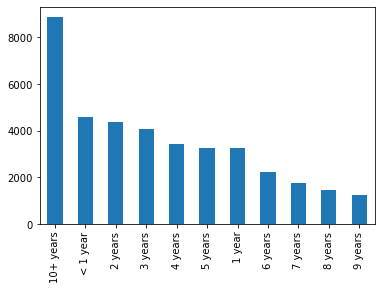

In [280]:
df_new2.emp_length.value_counts().plot.bar()

In [282]:
df_new2[['emp_title','emp_length','revol_util','last_pymnt_d']].head()

,emp_title,emp_length,revol_util,last_pymnt_d
0,NaN,10+ years,83.70%,Jan-15
1,Ryder,< 1 year,9.40%,Apr-13
2,NaN,10+ years,98.50%,Jun-14
3,AIR RESOURCES BOARD,10+ years,21%,Jan-15
4,University Medical Group,1 year,53.90%,May-16


In [283]:
df_new2[['emp_title','emp_length','revol_util','last_pymnt_d']].tail()

,emp_title,emp_length,revol_util,last_pymnt_d
39712,FiSite Research,4 years,13.10%,Jul-10
39713,"Squarewave Solutions, Ltd.",3 years,26.90%,Jul-10
39714,NaN,< 1 year,19.40%,Apr-08
39715,NaN,< 1 year,0.70%,Jan-08
39716,Evergreen Center,< 1 year,51.50%,Jun-10


In [289]:
df_new2.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [296]:
df_new2.int_rate = df_new2['int_rate'].replace("%",'',regex=True)

In [297]:
df_new2.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [313]:
df_new2.int_rate = df_new2.int_rate.astype('float64')

In [314]:
df_new2.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

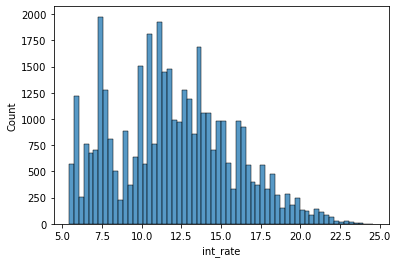

In [332]:
sns.histplot(df_new2.int_rate)

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

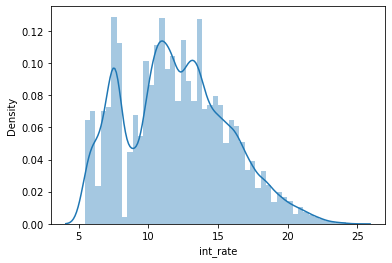

In [336]:
sns.distplot(df_new2.int_rate)

In [315]:
df_new2.revol_util= df_new2['revol_util'].replace("%",'',regex=True).astype('float64')

In [316]:
df_new2.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [325]:
df_new2.revol_util.value_counts().sort_values(ascending=False).head(30)

0.0     977
0.2      63
63.0     62
40.7     58
66.7     58
0.1      58
31.2     57
61.0     57
46.4     57
66.6     57
65.9     56
70.4     56
25.5     55
37.6     55
64.8     55
48.9     55
57.4     55
49.8     55
76.6     54
51.6     54
64.6     54
75.5     54
78.7     54
68.6     54
32.0     54
51.1     54
46.6     54
35.3     54
89.5     54
27.2     54
Name: revol_util, dtype: int64

<AxesSubplot:ylabel='Frequency'>

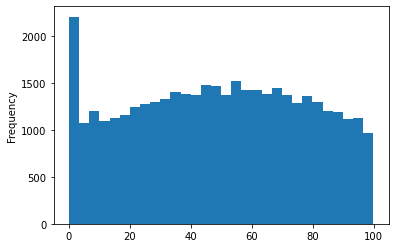

In [330]:
df_new2.revol_util.plot.hist(bins=30)

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

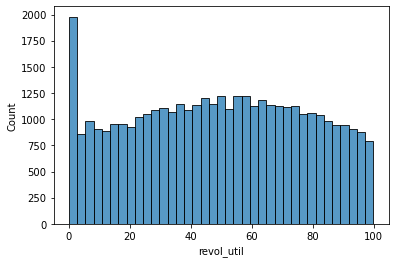

In [334]:
sns.histplot(df_new2.revol_util)

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

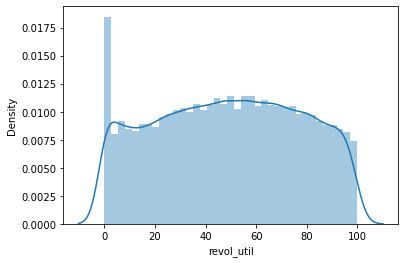

In [335]:
sns.distplot(df_new2.revol_util)

In [337]:
df_new2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0,0.0


In [355]:
df_new2.groupby('int_rate')['member_id'].count().sort_values(ascending=False).head(30)

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
Name: member_id, dtype: int64

In [356]:
df_new2.groupby('int_rate')['member_id'].count().sort_values(ascending=False).tail(30)

int_rate
14.62    2
14.70    2
21.82    2
14.88    2
15.01    2
15.07    2
15.38    2
15.83    2
20.20    2
16.33    2
17.90    2
17.03    2
17.15    2
17.44    1
24.40    1
18.72    1
18.36    1
17.54    1
20.52    1
17.46    1
22.64    1
17.34    1
21.48    1
14.67    1
16.96    1
16.71    1
16.20    1
16.15    1
16.01    1
24.59    1
Name: member_id, dtype: int64

In [370]:


df_new2['loan_amnt'].equals(df_new2['funded_amnt']) 

False

In [373]:
df_new2[['loan_amnt','funded_amnt']]

,loan_amnt,funded_amnt
0,5000,5000
1,2500,2500
2,2400,2400
3,10000,10000
4,3000,3000
...,...,...
39712,2500,2500
39713,8500,8500
39714,5000,5000
39715,5000,5000


In [374]:
df_new2['compare'] =df_new2.apply(lambda x: x['loan_amnt'] if x['loan_amnt'] == x['funded_amnt'] else np.nan, axis=1)
 

In [378]:
df_new2['compare'].isnull().sum()

1849

In [379]:
df_new2[df_new2['compare'].isnull()][['loan_amnt','funded_amnt']]

,loan_amnt,funded_amnt
61,17500,8950
66,12500,8925
70,20975,13575
77,7250,7200
80,35000,22075
...,...,...
39533,10000,6000
39593,20000,4800
39600,4000,1000
39601,12000,5000


In [ ]:
# from the above we come to know that the loan requested amount is not equal to loan dispursed amount

In [535]:
df_new2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare'],
      dtype='object')

In [397]:
df_new2.groupby(['grade'])['int_rate'].min()

grade
A     5.42
B     6.00
C     6.00
D     6.00
E     6.00
F    15.01
G    17.34
Name: int_rate, dtype: float64

In [398]:
df_new2.groupby(['grade'])['int_rate'].max()

grade
A     9.63
B    12.69
C    16.11
D    18.49
E    20.99
F    22.94
G    24.59
Name: int_rate, dtype: float64

In [389]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].nunique()

grade  sub_grade
A      A1            6
       A2            7
       A3            9
       A4           12
       A5           10
B      B1           15
       B2           15
       B3           15
       B4           13
       B5           15
C      C1           13
       C2           15
       C3           14
       C4           15
       C5           15
D      D1           15
       D2           14
       D3           14
       D4           13
       D5           15
E      E1           12
       E2           13
       E3           13
       E4           14
       E5           16
F      F1           11
       F2           12
       F3           11
       F4           12
       F5            9
G      G1            8
       G2            7
       G3            7
       G4            9
       G5            9
Name: int_rate, dtype: int64

In [392]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].unique()

grade  sub_grade
A      A1                        [6.03, 5.42, 6.39, 7.05, 7.37, 7.12]
       A2                   [6.62, 5.99, 5.79, 6.76, 7.4, 7.68, 7.43]
       A3           [7.51, 6.99, 7.42, 6.92, 6.17, 7.14, 7.74, 8.0...
       A4           [7.9, 7.49, 7.91, 7.29, 6.54, 7.51, 8.59, 9.32...
       A5           [8.9, 8.49, 7.66, 6.91, 7.88, 8.94, 9.63, 9.38...
B      B1           [9.91, 9.99, 9.67, 9.63, 6.0, 8.88, 10.38, 9.8...
       B2           [10.65, 10.59, 11.14, 6.0, 10.0, 9.25, 10.75, ...
       B3           [11.71, 10.99, 11.63, 10.37, 9.62, 11.12, 10.6...
       B4           [12.42, 11.49, 12.12, 10.74, 9.99, 10.99, 12.1...
       B5           [12.69, 6.0, 11.99, 12.62, 11.11, 10.36, 11.86...
C      C1           [13.49, 12.99, 12.87, 12.68, 12.23, 13.23, 12....
       C2           [14.27, 6.0, 13.49, 13.84, 13.06, 12.61, 13.61...
       C3           [14.65, 13.99, 14.82, 13.43, 12.98, 13.98, 13....
       C4           [15.27, 14.79, 15.62, 13.8, 13.35, 14.35, 13.8...
   

In [393]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].min()

grade  sub_grade
A      A1            5.42
       A2            5.79
       A3            6.17
       A4            6.00
       A5            6.91
B      B1            6.00
       B2            6.00
       B3            6.00
       B4            9.64
       B5            6.00
C      C1           10.28
       C2            6.00
       C3           10.91
       C4            6.00
       C5            6.00
D      D1            6.00
       D2            6.00
       D3           12.49
       D4           12.80
       D5            6.00
E      E1           13.43
       E2           13.75
       E3            6.00
       E4            6.00
       E5            6.00
F      F1           15.01
       F2           15.33
       F3           15.65
       F4           15.96
       F5           17.03
G      G1           17.34
       G2           19.16
       G3           18.72
       G4           19.04
       G5           18.36
Name: int_rate, dtype: float64

In [394]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].max()

grade  sub_grade
A      A1            7.37
       A2            7.68
       A3            8.00
       A4            9.32
       A5            9.63
B      B1           11.14
       B2           11.48
       B3           11.83
       B4           12.42
       B5           12.69
C      C1           13.49
       C2           14.27
       C3           14.82
       C4           15.62
       C5           16.11
D      D1           16.59
       D2           17.19
       D3           17.54
       D4           18.07
       D5           18.49
E      E1           19.39
       E2           19.79
       E3           20.20
       E4           20.69
       E5           20.99
F      F1           21.48
       F2           21.82
       F3           21.67
       F4           22.64
       F5           22.94
G      G1           22.74
       G2           23.13
       G3           23.52
       G4           24.40
       G5           24.59
Name: int_rate, dtype: float64

In [395]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].mean()

grade  sub_grade
A      A1            5.805224
       A2            6.378733
       A3            7.164552
       A4            7.660797
       A5            8.266937
B      B1           10.003781
       B2           10.489285
       B3           10.992979
       B4           11.409598
       B5           11.784135
C      C1           12.851985
       C2           13.352551
       C3           13.658653
       C4           14.050453
       C5           14.500514
D      D1           14.853169
       D2           15.349421
       D3           15.775209
       D4           16.163955
       D5           16.641911
E      E1           17.017339
       E2           17.444497
       E3           17.776582
       E4           18.270749
       E5           18.710337
F      F1           19.201793
       F2           19.383173
       F3           20.025892
       F4           20.364762
       F5           20.738729
G      G1           21.101538
       G2           21.066026
       G3           21.

In [405]:
df_new2.groupby(['grade','sub_grade'])['int_rate'].median()

grade  sub_grade
A      A1            5.42
       A2            5.99
       A3            7.14
       A4            7.51
       A5            8.49
B      B1            9.91
       B2           10.59
       B3           10.99
       B4           11.49
       B5           11.99
C      C1           12.99
       C2           13.49
       C3           13.57
       C4           13.92
       C5           14.26
D      D1           14.61
       D2           15.21
       D3           15.58
       D4           15.95
       D5           16.32
E      E1           16.45
       E2           16.82
       E3           17.19
       E4           17.56
       E5           17.93
F      F1           18.30
       F2           18.67
       F3           20.99
       F4           19.41
       F5           19.79
G      G1           20.16
       G2           20.48
       G3           20.90
       G4           21.27
       G5           21.59
Name: int_rate, dtype: float64

In [406]:
df_new2.groupby(['grade','sub_grade','purpose'])['int_rate'].median().head(30)

grade  sub_grade  purpose           
A      A1         car                   5.42
                  credit_card           5.42
                  debt_consolidation    6.03
                  home_improvement      5.42
                  house                 6.03
                  major_purchase        5.42
                  medical               6.03
                  moving                6.03
                  other                 6.03
                  renewable_energy      6.03
                  small_business        6.03
                  vacation              6.03
                  wedding               5.42
       A2         car                   5.99
                  credit_card           5.99
                  debt_consolidation    5.99
                  educational           7.40
                  home_improvement      5.99
                  house                 6.62
                  major_purchase        5.99
                  medical               6.62
                  

In [407]:
df_new2.groupby(['grade','sub_grade','purpose'])['int_rate'].median().tail(30)

grade  sub_grade  purpose           
G      G2         major_purchase        21.255
                  other                 22.480
                  small_business        20.325
                  vacation              22.480
                  wedding               20.480
       G3         car                   22.850
                  credit_card           20.850
                  debt_consolidation    20.900
                  home_improvement      20.850
                  medical               20.875
                  other                 22.850
                  small_business        20.850
                  wedding               20.850
       G4         credit_card           21.270
                  debt_consolidation    22.245
                  educational           21.270
                  home_improvement      21.995
                  house                 21.065
                  moving                21.220
                  other                 21.995
                  renew

In [409]:
df_new2.groupby(['grade','sub_grade','purpose','term'])['int_rate'].median().head(30)

grade  sub_grade  purpose             term      
A      A1         car                  36 months    5.420
                  credit_card          36 months    5.420
                  debt_consolidation   36 months    6.030
                  home_improvement     36 months    5.420
                  house                36 months    6.030
                  major_purchase       36 months    5.420
                  medical              36 months    6.030
                  moving               36 months    6.030
                  other                36 months    6.030
                  renewable_energy     36 months    6.030
                  small_business       36 months    6.030
                  vacation             36 months    6.030
                  wedding              36 months    5.420
       A2         car                  36 months    5.990
                                       60 months    5.790
                  credit_card          36 months    5.990
                       

In [410]:
df_new2.groupby(['grade','sub_grade','purpose','term'])['int_rate'].median().tail(30)

grade  sub_grade  purpose             term      
G      G3         debt_consolidation   60 months    20.900
                  home_improvement     60 months    20.850
                  medical              60 months    20.875
                  other                60 months    22.850
                  small_business       36 months    20.520
                                       60 months    20.850
                  wedding              60 months    20.850
       G4         credit_card          36 months    21.065
                                       60 months    21.270
                  debt_consolidation   36 months    21.270
                                       60 months    23.220
                  educational          60 months    21.270
                  home_improvement     60 months    21.995
                  house                36 months    21.065
                  moving               60 months    21.220
                  other                36 months    19.040
       

In [415]:
df_new2.groupby(['grade','sub_grade','emp_length'])['int_rate'].median().head(50)

grade  sub_grade  emp_length
A      A1         1 year        6.030
                  10+ years     5.420
                  2 years       6.030
                  3 years       5.420
                  4 years       6.030
                  5 years       6.030
                  6 years       5.420
                  7 years       6.030
                  8 years       6.030
                  9 years       6.030
                  < 1 year      6.030
       A2         1 year        6.620
                  10+ years     6.620
                  2 years       6.620
                  3 years       5.990
                  4 years       6.620
                  5 years       5.990
                  6 years       5.990
                  7 years       6.620
                  8 years       6.620
                  9 years       5.990
                  < 1 year      6.620
       A3         1 year        7.325
                  10+ years     7.140
                  2 years       7.140
                  3 y

In [416]:
df_new2.groupby(['grade','sub_grade','emp_length'])['int_rate'].median().tail(50)

grade  sub_grade  emp_length
G      G1         4 years       22.110
                  5 years       22.110
                  6 years       22.110
                  7 years       20.135
                  8 years       20.790
                  9 years       22.110
                  < 1 year      21.135
       G2         1 year        20.480
                  10+ years     20.505
                  2 years       20.480
                  3 years       20.530
                  4 years       20.170
                  5 years       22.480
                  6 years       20.030
                  7 years       20.505
                  8 years       22.480
                  9 years       20.530
                  < 1 year      20.480
       G3         1 year        22.210
                  10+ years     20.850
                  2 years       21.850
                  3 years       22.850
                  4 years       20.850
                  5 years       20.900
                  6 years       23.

In [423]:
df_new2.groupby(['grade','sub_grade','installment'])['int_rate'].median().tail(50)

grade  sub_grade  installment
G      G4         559.27         23.22
                  570.73         21.22
                  574.32         23.91
                  619.55         23.91
                  625.73         21.27
                  640.69         21.27
                  652.94         21.27
                  673.11         20.77
                  680.14         21.27
                  715.75         23.91
                  717.90         23.91
                  815.32         21.22
                  827.33         20.86
                  835.63         23.91
                  852.86         23.91
                  863.85         23.22
                  902.54         20.86
                  945.35         21.27
                  951.21         21.22
                  991.10         23.22
                  1005.06        23.91
       G5         128.72         21.59
                  235.47         21.59
                  238.77         21.14
                  377.47         2

In [433]:
df_new2.groupby(['grade','sub_grade','installment'])['int_rate'].median().head(50)

grade  sub_grade  installment
A      A1         22.51          7.37
                  24.84          7.37
                  30.16          5.42
                  30.44          6.03
                  30.60          6.39
                  30.94          7.12
                  31.05          7.37
                  36.20          5.42
                  36.48          7.37
                  36.53          6.03
                  37.70          5.42
                  39.21          5.42
                  39.57          6.03
                  39.78          6.39
                  40.72          5.42
                  42.23          5.42
                  42.61          6.03
                  45.24          5.42
                  45.66          6.03
                  45.91          6.39
                  46.00          5.42
                  46.35          7.05
                  46.57          7.37
                  46.75          5.42
                  48.26          5.42
                  48

In [421]:
df_new2[df_new2['int_rate']>15].int_rate.count()

8530

In [422]:
df_new2[df_new2['int_rate']>15].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,compare
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,0.0,2500.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0,0.0,2400.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,0.0,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL,0.0,0.0,7000.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,0.0,0.00,0.00,Jan-15,111.34,Dec-14,INDIVIDUAL,0.0,0.0,3000.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,0.0,189.06,2.09,Apr-12,152.39,Aug-12,INDIVIDUAL,0.0,0.0,5600.0


In [425]:
df_new2.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [428]:
df_new2.installment.value_counts().sort_index(ascending=False)

1305.19    1
1302.69    1
1295.21    1
1288.10    2
1283.50    1
          ..
16.47      1
16.31      1
16.25      1
16.08      1
15.69      1
Name: installment, Length: 15383, dtype: int64

In [429]:
df_new2.installment.value_counts().sort_values(ascending=False)

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
400.76     1
827.33     1
313.95     1
41.38      1
255.43     1
Name: installment, Length: 15383, dtype: int64

In [432]:
df_new2[df_new2.installment>1000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,compare
128,1068159,1302729,35000,35000,35000.00000,36 months,8.90,1111.37,A,A5,...,0.0,0.0,0.0,Jan-15,1123.85,Mar-16,INDIVIDUAL,0.0,0.0,35000.0
185,1067084,1301459,35000,35000,35000.00000,36 months,10.65,1140.07,B,B2,...,0.0,0.0,0.0,Oct-13,272.59,Sep-13,INDIVIDUAL,0.0,0.0,35000.0
276,1065896,1300036,35000,35000,35000.00000,36 months,8.90,1111.37,A,A5,...,0.0,0.0,0.0,Oct-12,27308.49,Oct-12,INDIVIDUAL,0.0,0.0,35000.0
507,1053188,1284748,30000,30000,30000.00000,36 months,12.42,1002.46,B,B4,...,0.0,0.0,0.0,Dec-14,1013.44,Apr-16,INDIVIDUAL,0.0,0.0,30000.0
609,1056174,1287750,35000,35000,35000.00000,36 months,8.90,1111.37,A,A5,...,0.0,0.0,0.0,Dec-14,1120.69,Apr-16,INDIVIDUAL,0.0,0.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,677937,866167,30000,30000,30000.00000,36 months,18.62,1093.93,F,F2,...,0.0,0.0,0.0,Jan-13,14774.66,May-16,INDIVIDUAL,0.0,0.0,30000.0
19319,677569,865685,31050,31050,31050.00000,36 months,14.17,1063.79,C,C5,...,0.0,0.0,0.0,Nov-12,16512.91,May-16,INDIVIDUAL,0.0,0.0,31050.0
19356,674846,862525,35000,35000,34930.28146,36 months,13.80,1192.83,C,C4,...,0.0,0.0,0.0,Mar-13,4913.77,Mar-13,INDIVIDUAL,0.0,0.0,35000.0
19369,676202,864156,30000,30000,29856.31064,36 months,14.91,1038.64,D,D2,...,0.0,0.0,0.0,Mar-14,1102.12,Mar-14,INDIVIDUAL,0.0,0.0,30000.0


In [439]:
df_new2.groupby(['grade'])['member_id'].count()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: member_id, dtype: int64

<AxesSubplot:xlabel='grade'>

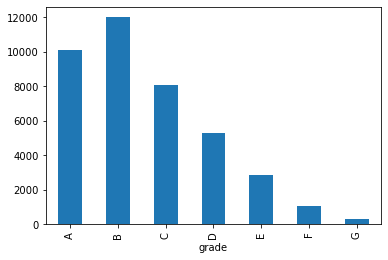

In [446]:
df_new2.groupby(['grade'])['member_id'].count().plot.bar()

In [444]:
df_new2.groupby(['grade','sub_grade'])['member_id'].count()

grade  sub_grade
A      A1           1139
       A2           1508
       A3           1810
       A4           2886
       A5           2742
B      B1           1830
       B2           2057
       B3           2917
       B4           2512
       B5           2704
C      C1           2136
       C2           2011
       C3           1529
       C4           1236
       C5           1186
D      D1            931
       D2           1348
       D3           1173
       D4            981
       D5            874
E      E1            763
       E2            656
       E3            553
       E4            454
       E5            416
F      F1            329
       F2            249
       F3            185
       F4            168
       F5            118
G      G1            104
       G2             78
       G3             48
       G4             56
       G5             30
Name: member_id, dtype: int64

<AxesSubplot:xlabel='grade,sub_grade'>

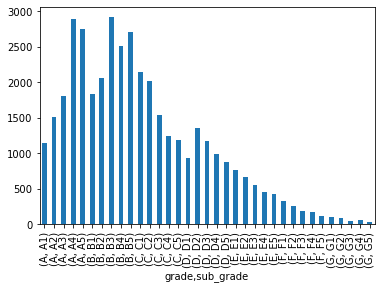

In [447]:
df_new2.groupby(['grade','sub_grade'])['member_id'].count().plot.bar()

In [587]:
ax = df_new2.groupby(['grade','sub_grade'])['member_id'].count().reset_index()

In [588]:
ax

,grade,sub_grade,member_id
0,A,A1,1139
1,A,A2,1508
2,A,A3,1810
3,A,A4,2886
4,A,A5,2742
5,B,B1,1830
6,B,B2,2057
7,B,B3,2917
8,B,B4,2512
9,B,B5,2704


Text(0, 0.5, 'no of members')

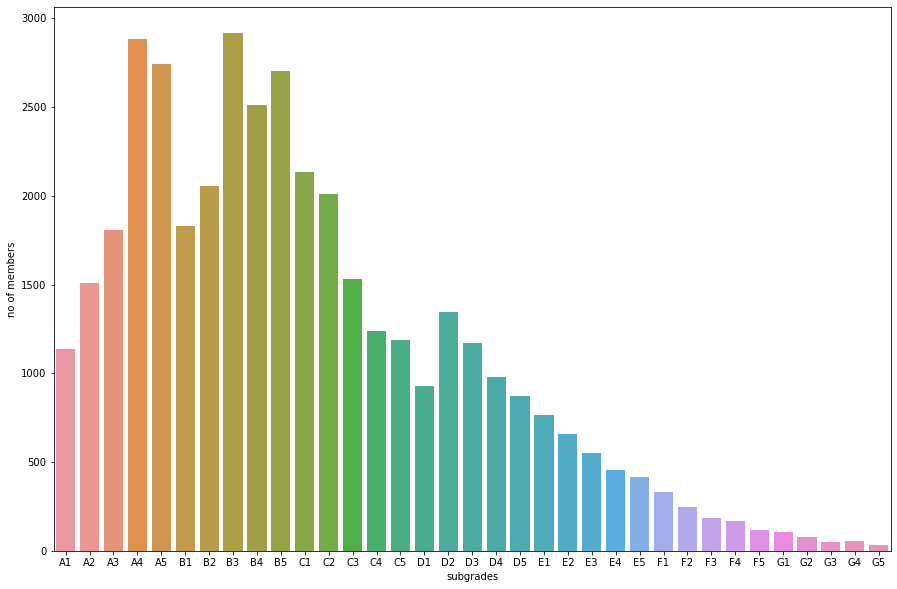

In [592]:
plt.figure(figsize=(15,10))
sns.barplot(x=ax.sub_grade,y=ax.member_id)
plt.xlabel("subgrades")
plt.ylabel("no of members")

In [540]:
df_new2.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [546]:
df_new2['term_months'] = df_new2['term'].str.split(" ",expand=True)[1]

In [547]:
df_new2.term_months.unique()

array(['36', '60'], dtype=object)

In [548]:
df_new2.term_months.value_counts()

36    29096
60    10621
Name: term_months, dtype: int64

In [549]:
df_new2.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [557]:
df_new2.drop('term_months',axis=1,inplace=True)

In [651]:
df_new2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare'],
      dtype='object')

In [650]:
df_new2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare'],
      dtype='object')

In [562]:
df_new2.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [655]:
df_new2['issue_d_year']=pd.DatetimeIndex(pd.to_datetime(df_new2["issue_d"], format="%b-%y")).year

In [654]:
df_new2['issue_d_month']=pd.DatetimeIndex(pd.to_datetime(df_new2["issue_d"], format="%b-%y")).month

In [656]:
df_new2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,compare,issue_d_year,issue_d_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0,5000.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,2500.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0,2400.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,10000.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0,3000.0,2011,12


In [660]:
df_new2['issue_d_year'].dtype

dtype('int64')

In [657]:
df_new2.groupby('issue_d')['member_id'].count()

issue_d
Apr-08     155
Apr-09     290
Apr-10     827
Apr-11    1562
Aug-07      33
Aug-08      71
Aug-09     408
Aug-10    1078
Aug-11    1928
Dec-07      85
Dec-08     223
Dec-09     598
Dec-10    1267
Dec-11    2260
Feb-08     174
Feb-09     260
Feb-10     627
Feb-11    1297
Jan-08     171
Jan-09     239
Jan-10     589
Jan-11    1380
Jul-07      30
Jul-08      83
Jul-09     374
Jul-10    1119
Jul-11    1870
Jun-07       1
Jun-08      66
Jun-09     356
Jun-10    1029
Jun-11    1827
Mar-08     236
Mar-09     276
Mar-10     737
Mar-11    1443
May-08      71
May-09     319
May-10     920
May-11    1689
Nov-07      37
Nov-08     184
Nov-09     602
Nov-10    1121
Nov-11    2223
Oct-07      47
Oct-08      96
Oct-09     545
Oct-10    1132
Oct-11    2114
Sep-07      18
Sep-08      32
Sep-09     449
Sep-10    1086
Sep-11    2063
Name: member_id, dtype: int64

In [658]:
df_new2.groupby(['issue_d_month','issue_d_year'])['member_id'].count()

issue_d_month  issue_d_year
1              2008             171
               2009             239
               2010             589
               2011            1380
2              2008             174
               2009             260
               2010             627
               2011            1297
3              2008             236
               2009             276
               2010             737
               2011            1443
4              2008             155
               2009             290
               2010             827
               2011            1562
5              2008              71
               2009             319
               2010             920
               2011            1689
6              2007               1
               2008              66
               2009             356
               2010            1029
               2011            1827
7              2007              30
               2008              83


In [573]:
df_new2.groupby('issue_d_year')['member_id'].count()

issue_d_year
07      251
08     1562
09     4716
10    11532
11    21656
Name: member_id, dtype: int64

In [575]:
df_new2.last_pymnt_d.head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [578]:
df_new2.groupby('last_pymnt_d')['member_id'].count()

last_pymnt_d
Apr-08     12
Apr-09     43
Apr-10    114
Apr-11    420
Apr-12    734
         ... 
Sep-11    450
Sep-12    761
Sep-13    684
Sep-14    693
Sep-15    202
Name: member_id, Length: 101, dtype: int64

In [677]:
df_new2.last_pymnt_d.isnull().sum()

71

In [688]:
df_new3 = df_new2.dropna(subset=['last_pymnt_d'])

In [689]:
df_new3.last_pymnt_d.isnull().sum()

0

In [691]:
df_new3[df_new3.last_credit_pull_d.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,compare,issue_d_year,issue_d_month
26025,575712,740467,5000,5000,5000.0,36 months,11.12,163.98,B,B3,...,106.96,1.34,Jun-12,163.98,NaN,INDIVIDUAL,0.0,5000.0,2010,9
39476,186499,186347,1000,1000,875.0,36 months,7.12,30.94,A,A1,...,0.00,0.00,Aug-10,185.80,NaN,INDIVIDUAL,0.0,1000.0,2007,12


In [692]:
df_new3 = df_new3.dropna(subset=['last_credit_pull_d'])

In [693]:
df_new3.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2450
emp_length                 1070
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   46
total_acc                     0
out_prncp                     0
out_prnc

In [695]:
df_new3['last_pymnt_d_month']=pd.DatetimeIndex(pd.to_datetime(df_new3["last_pymnt_d"],format="%b-%y")).month
df_new3['last_pymnt_d_year']=pd.DatetimeIndex(pd.to_datetime(df_new3["last_pymnt_d"],format="%b-%y")).year

In [696]:
df_new3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,compare,issue_d_year,issue_d_month,last_pymnt_d_month,last_pymnt_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,May-16,INDIVIDUAL,0.0,5000.0,2011,12,1,2015
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,2500.0,2011,12,4,2013
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Jun-14,649.91,May-16,INDIVIDUAL,0.0,2400.0,2011,12,6,2014
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,10000.0,2011,12,1,2015
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,May-16,67.79,May-16,INDIVIDUAL,0.0,3000.0,2011,12,5,2016


In [700]:
ax1 = df_new3.groupby('last_pymnt_d_year')['member_id'].count().reset_index()
ax1

,last_pymnt_d_year,member_id
0,2008,137
1,2009,559
2,2010,1847
3,2011,4996
4,2012,8903
5,2013,9458
6,2014,9269
7,2015,2431
8,2016,2044


Text(0, 0.5, 'No of members')

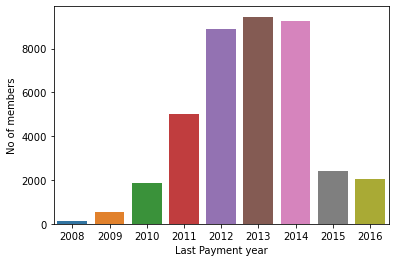

In [701]:
sns.barplot(x = ax1.last_pymnt_d_year,y=ax1.member_id)
plt.xlabel("Last Payment year")
plt.ylabel("No of members")

In [702]:
df_new3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare', 'issue_d_year', 'issue_d_month', 'last_pymnt_d_month',
       'last_pymnt_d_year'],
      dtype='object')

In [703]:
df_new3.last_credit_pull_d.head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
4    May-16
Name: last_credit_pull_d, dtype: object

In [ ]:
df_new3['last_credit_pull_d_month']=pd.DatetimeIndex(pd.to_datetime(df_new3["last_credit_pull_d"],format="%b-%y")).month

df_new3['last_credit_pull_d_year']=pd.DatetimeIndex(pd.to_datetime(df_new3["last_credit_pull_d"],format="%b-%y")).year

In [705]:
df_new3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,application_type,pub_rec_bankruptcies,compare,issue_d_year,issue_d_month,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,May-16,INDIVIDUAL,0.0,5000.0,2011,12,1,2015,5,2016
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Sep-13,INDIVIDUAL,0.0,2500.0,2011,12,4,2013,9,2013
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,May-16,INDIVIDUAL,0.0,2400.0,2011,12,6,2014,5,2016
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Apr-16,INDIVIDUAL,0.0,10000.0,2011,12,1,2015,4,2016
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,May-16,INDIVIDUAL,0.0,3000.0,2011,12,5,2016,5,2016


In [706]:
ax2 = df_new3.groupby('last_credit_pull_d_year')['member_id'].count().reset_index()
ax2

,last_credit_pull_d_year,member_id
0,2007,36
1,2008,41
2,2009,224
3,2010,835
4,2011,2174
5,2012,4071
6,2013,5164
7,2014,6253
8,2015,5499
9,2016,15347


Text(0, 0.5, 'No of members')

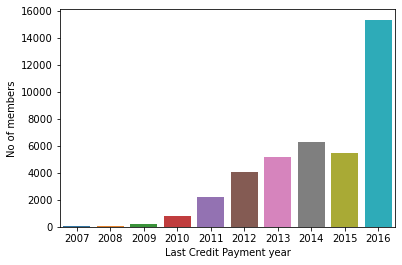

In [707]:
sns.barplot(x = ax2.last_credit_pull_d_year,y=ax2.member_id)
plt.xlabel("Last Credit Payment year")
plt.ylabel("No of members")

In [718]:
df_new3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare', 'issue_d_year', 'issue_d_month', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year'],
      dtype='object')

In [708]:
df_new3.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,compare,issue_d_year,issue_d_month,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,3.964400e+04,3.964400e+04,39644.000000,39644.00000,39644.000000,39644.000000,39644.000000,3.964400e+04,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,37795.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,6.831571e+05,8.504905e+05,11225.073151,10952.84217,10403.925605,12.017719,324.699200,6.900832e+04,13.317752,0.146277,...,12.296210,2683.750099,0.042428,10849.588570,2010.328978,7.172258,6.444178,2012.821057,5.817249,2014.287736
std,2.107102e+05,2.657028e+05,7455.197984,7185.40898,7128.300533,3.724719,208.818933,6.383481e+04,6.677311,0.491143,...,148.332033,4449.746502,0.202439,7227.694598,0.877502,3.397438,3.429454,1.539846,3.026837,1.788581
min,5.473400e+04,7.069900e+04,500.000000,500.00000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,500.000000,2007.000000,1.000000,1.000000,2008.000000,1.000000,2007.000000
25%,5.162455e+05,6.668655e+05,5500.000000,5400.00000,5000.000000,9.250000,167.080000,4.050000e+04,8.180000,0.000000,...,0.000000,219.847500,0.000000,5000.000000,2010.000000,4.000000,3.000000,2012.000000,4.000000,2013.000000
50%,6.656255e+05,8.508075e+05,10000.000000,9600.00000,8975.000000,11.830000,280.500000,5.900000e+04,13.410000,0.000000,...,0.000000,548.550000,0.000000,9500.000000,2011.000000,7.000000,6.000000,2013.000000,5.000000,2015.000000
75%,8.377930e+05,1.047358e+06,15000.000000,15000.00000,14400.000000,14.590000,430.780000,8.240400e+04,18.600000,0.000000,...,0.000000,3304.707500,0.000000,15000.000000,2011.000000,10.000000,9.000000,2014.000000,8.000000,2016.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.00000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,7002.190000,36115.200000,2.000000,35000.000000,2011.000000,12.000000,12.000000,2016.000000,12.000000,2016.000000


# 3. Since the Case study is to analyze for the new applicants if they will be able to pay the loan or not if approved.  We will not be able to derive insights with the loan member who are currently repaying the loan as we dont have much visibility to their behaviour and there is always 50% chance for a person able to repay all the loan or they can default.

In [899]:
df_new3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'compare', 'issue_d_year', 'issue_d_month', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year'],
      dtype='object')

In [900]:
df_new3.loan_status.value_counts()

Fully Paid     32949
Charged Off     5555
Current         1140
Name: loan_status, dtype: int64

In [901]:
# creating a new dataframe containing all rows except current loan status

In [1042]:
df_new4= df_new3[df_new3['loan_status']!='Current']

In [1043]:
df_new4.loan_status.value_counts()

Fully Paid     32949
Charged Off     5555
Name: loan_status, dtype: int64

In [1044]:
df_new4.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2377
emp_length                  1028
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    46
total_acc                      0
out_prncp 

<AxesSubplot:>

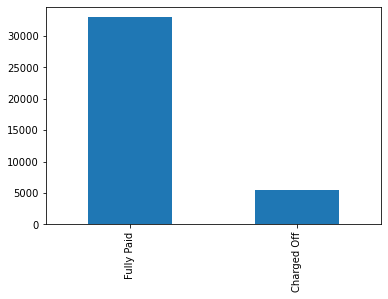

In [1045]:
df_new4.loan_status.value_counts().plot.bar()

In [1046]:

Full_paid_total = (df_new4.loan_status=='Fully Paid').sum()

In [1047]:
Charged_off_total = (df_new4.loan_status=='Charged Off').sum()

In [1048]:
Percentage_charged_off= round(Charged_off_total/(Full_paid_total+Charged_off_total)*100)
Percentage_charged_off

14

In [1049]:
Percentage_full_paid = round(Full_paid_total/(Full_paid_total+Charged_off_total)*100)
Percentage_full_paid

86

In [958]:
#looks like around 14% of the population have the status of charged off/there are around 14% loan applications that have defaulted.

In [1050]:
loan_vs_purpose = df_new4.groupby('purpose')['loan_status'].value_counts().unstack(level=1)

<AxesSubplot:xlabel='purpose'>

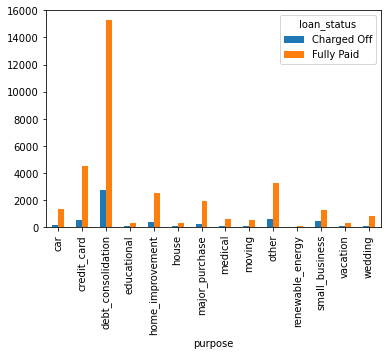

In [1051]:
loan_vs_purpose.plot.bar()

# Observation:  

### It is observed that mostly people have taken loan for debt consolidation. The most loan paid and the most defaults are found for debt consolidation category.

In [1066]:
add_state_vs_loan_status = df_new4.groupby('addr_state')['loan_status'].value_counts().unstack(level=1)
add_state_vs_loan_status.sort_values(by='Fully Paid',ascending=False)

loan_status,Charged Off,Fully Paid
addr_state,,
CA,1105.0,5823.0
NY,487.0,3203.0
TX,308.0,2343.0
FL,501.0,2277.0
NJ,275.0,1512.0
PA,178.0,1288.0
IL,195.0,1281.0
VA,174.0,1192.0
GA,213.0,1144.0


In [1069]:
add_state_vs_loan_status.columns

Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')

<Figure size 720x1440 with 0 Axes>

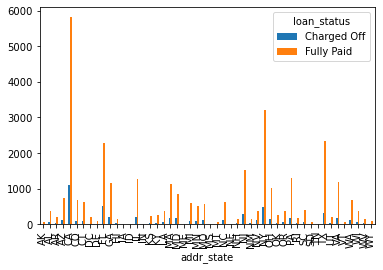

In [1067]:
plt.figure(figsize=[10,20])
add_state_vs_loan_status.plot.bar()
plt.show()

In [1005]:
df_new4.nunique()

id                          38504
member_id                   38504
loan_amnt                     870
funded_amnt                  1019
funded_amnt_inv              8050
term                            2
int_rate                      370
installment                 15004
grade                           7
sub_grade                      35
emp_title                   27914
emp_length                     11
home_ownership                  5
annual_inc                   5206
verification_status             3
issue_d                        55
loan_status                     2
url                         38504
purpose                        14
zip_code                      822
addr_state                     50
dti                          2853
delinq_2yrs                    11
earliest_cr_line              524
inq_last_6mths                  9
open_acc                       40
pub_rec                         5
revol_bal                   21262
revol_util                   1088
total_acc     

In [1068]:
behavioural_variables= ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','compare']


In [1070]:
len(behavioural_variables)

22

In [1071]:
df_new4[behavioural_variables]

,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,compare
0,0,Jan-85,1,3,0,13648,83.7,9,0.0,0.0,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,5000.0
1,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,2500.0
2,0,Nov-01,2,2,0,2956,98.5,10,0.0,0.0,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,2400.0
3,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,10000.0
5,0,Nov-04,3,9,0,7963,28.3,12,0.0,0.0,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,Nov-90,0,13,0,7274,13.1,40,0.0,0.0,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,INDIVIDUAL,2500.0
39713,1,Dec-86,1,6,0,8847,26.9,9,0.0,0.0,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,INDIVIDUAL,8500.0
39714,0,Oct-98,0,11,0,9698,19.4,20,0.0,0.0,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,INDIVIDUAL,5000.0
39715,0,Nov-88,0,17,0,85607,0.7,26,0.0,0.0,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,INDIVIDUAL,5000.0


In [1072]:
df_new4.drop(behavioural_variables,axis=1,inplace=True)

In [1073]:
df_new4.shape

(38504, 29)

In [1074]:
df_new4.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year'],
      dtype='object')

In [1075]:
df_new4.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2377
emp_length                  1028
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
pub_rec_bankruptcies           0
issue_d_year                   0
issue_d_month                  0
last_pymnt_d_month             0
last_pymnt_d_year              0
last_credit_pull_d_month       0
last_credit_pull_d_year        0
dtype: int64

In [1018]:
df_new4.zip_code.head()

0    860xx
1    309xx
2    606xx
3    917xx
5    852xx
Name: zip_code, dtype: object

In [1019]:
df_new4.zip_code.value_counts()

100xx    582
945xx    530
112xx    500
606xx    493
070xx    453
        ... 
463xx      1
381xx      1
592xx      1
378xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

In [1021]:
df_new4.emp_title.value_counts()

US Army                   275
US Air Force              148
Bank of America           115
US Postal Service         111
Self Employed              99
                         ... 
Valir Health                1
ESAB                        1
Whole Health Dentistry      1
ASU                         1
Evergreen Center            1
Name: emp_title, Length: 27914, dtype: int64

In [1023]:
df_new4.groupby('emp_title')['loan_status'].value_counts().unstack(level=1)

loan_status,Charged Off,Fully Paid
emp_title,,
old palm inc,NaN,1.0
Brocade Communications,NaN,1.0
CenturyLink,NaN,1.0
Department of Homeland Security,NaN,1.0
"Down To Earth Distributors, Inc.",NaN,1.0
...,...,...
zashko inc.,NaN,1.0
zeno office solutions,NaN,1.0
zion lutheran school,NaN,1.0


In [1024]:
df_new4.groupby('zip_code')['loan_status'].value_counts().unstack(level=1)

loan_status,Charged Off,Fully Paid
zip_code,,
007xx,NaN,1.0
010xx,14.0,84.0
011xx,1.0,13.0
012xx,1.0,12.0
013xx,3.0,10.0
...,...,...
995xx,5.0,28.0
996xx,2.0,10.0
997xx,6.0,14.0


In [1076]:
#since we are not able to use emp_tile,url and zip_code to derive meaning full insights removing these 3 columns

In [1077]:
df_new4.drop(['emp_title','zip_code','url'],axis=1,inplace=True)

In [1078]:
df_new4.nunique()

id                          38504
member_id                   38504
loan_amnt                     870
funded_amnt                  1019
funded_amnt_inv              8050
term                            2
int_rate                      370
installment                 15004
grade                           7
sub_grade                      35
emp_length                     11
home_ownership                  5
annual_inc                   5206
verification_status             3
issue_d                        55
loan_status                     2
purpose                        14
addr_state                     50
dti                          2853
pub_rec_bankruptcies            3
issue_d_year                    5
issue_d_month                  12
last_pymnt_d_month             12
last_pymnt_d_year               9
last_credit_pull_d_month       12
last_credit_pull_d_year        10
dtype: int64

In [1079]:
# identify and remove the outliers 

In [1106]:
df_new4.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,3.850400e+04,3.850400e+04,38504.000000,38504.000000,38504.000000,38504.000000,38504.000000,3.850400e+04,38504.000000,38504.000000,38504.000000,38504.000000,38504.000000,38504.000000,38504.000000,38504.000000
mean,6.763918e+05,8.422966e+05,11052.494546,10789.029062,10228.817897,11.928490,322.603687,6.881818e+04,13.275347,0.042619,2010.309111,7.114741,6.488157,2012.726937,5.846172,2014.237300
std,2.092784e+05,2.644756e+05,7346.828612,7088.329819,7022.524237,3.691065,208.582507,6.426158e+04,6.671730,0.202641,0.882656,3.409087,3.470007,1.460569,3.065627,1.790198
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2007.000000,1.000000,1.000000,2008.000000,1.000000,2007.000000
25%,5.121308e+05,6.611868e+05,5318.750000,5200.000000,5000.000000,8.940000,165.747500,4.000000e+04,8.140000,0.000000,2010.000000,4.000000,3.000000,2012.000000,4.000000,2013.000000
50%,6.563940e+05,8.392470e+05,9600.000000,9600.000000,8750.000000,11.710000,278.130000,5.900000e+04,13.370000,0.000000,2011.000000,7.000000,6.000000,2013.000000,5.000000,2015.000000
75%,8.291518e+05,1.037365e+06,15000.000000,15000.000000,14000.000000,14.350000,425.550000,8.200000e+04,18.560000,0.000000,2011.000000,10.000000,10.000000,2014.000000,8.000000,2016.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000,2011.000000,12.000000,12.000000,2016.000000,12.000000,2016.000000


<AxesSubplot:xlabel='loan_amnt'>

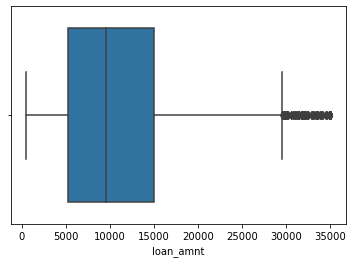

In [1080]:
sns.boxplot(df_new4.loan_amnt)

In [1084]:
np.percentile(df_new4.loan_amnt,95)


25000.0

In [1085]:
Q1 = df_new4.loan_amnt.quantile(0.25)
Q3 = df_new4.loan_amnt.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9681.25


In [1086]:
Q1_df_new4 = df_new4.quantile(0.25)
Q3_df_new4 = df_new4.quantile(0.75)
IQR_df_new4 = Q3_df_new4 - Q1_df_new4
print(IQR_df_new4)

id                          317021.0000
member_id                   376178.2500
loan_amnt                     9681.2500
funded_amnt                   9800.0000
funded_amnt_inv               9000.0000
int_rate                         5.4100
installment                    259.8025
annual_inc                   42000.0000
dti                             10.4200
pub_rec_bankruptcies             0.0000
issue_d_year                     1.0000
issue_d_month                    6.0000
last_pymnt_d_month               7.0000
last_pymnt_d_year                2.0000
last_credit_pull_d_month         4.0000
last_credit_pull_d_year          3.0000
dtype: float64


In [1087]:
df_new4.loan_amnt.skew()

1.077999627811089

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='verification_status'>

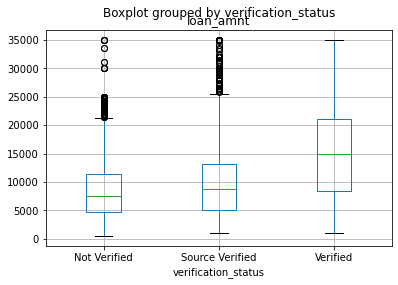

In [1089]:
df_new4.boxplot(column='loan_amnt', by='verification_status')

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='term'>

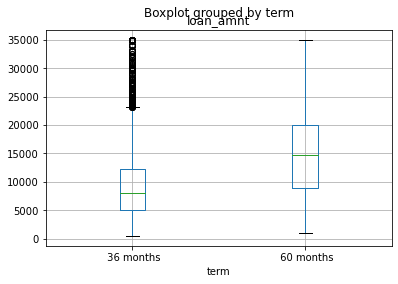

In [1091]:
df_new4.boxplot(column='loan_amnt', by='term')

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='grade'>

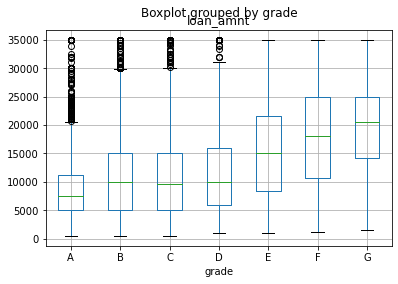

In [1092]:
df_new4.boxplot(column='loan_amnt', by='grade')

In [1096]:
df_new4.loan_amnt.quantile(.97)

28000.0

<AxesSubplot:title={'center':'funded_amnt'}, xlabel='issue_d_year'>

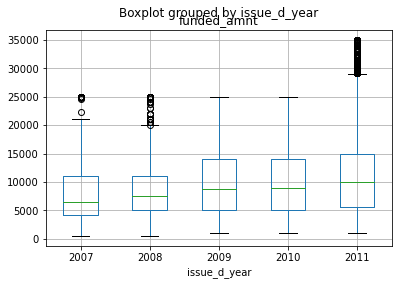

In [1094]:

df_new4.boxplot(column='funded_amnt', by='issue_d_year')

<AxesSubplot:xlabel='funded_amnt'>

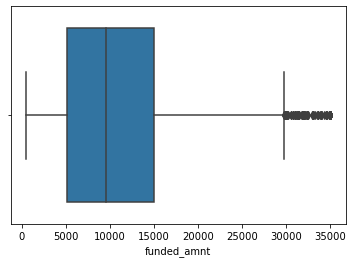

In [1098]:
sns.boxplot(df_new4.funded_amnt)

In [1101]:
print(np.percentile(df_new4.funded_amnt,95))
print(np.percentile(df_new4.funded_amnt,97))
print(np.percentile(df_new4.funded_amnt_inv,97))

25000.0
27000.0
25816.094683199724


<AxesSubplot:xlabel='funded_amnt_inv'>

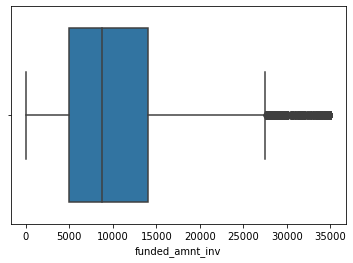

In [1102]:
sns.boxplot(df_new4.funded_amnt_inv)



<AxesSubplot:xlabel='int_rate'>

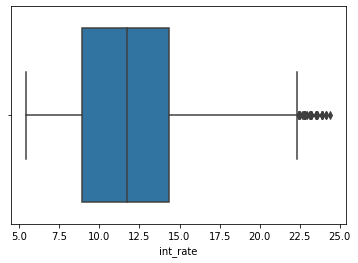

In [1103]:
sns.boxplot(df_new4.int_rate)


In [1110]:
print(np.percentile(df_new4.int_rate,95))

18.3


<AxesSubplot:xlabel='installment'>

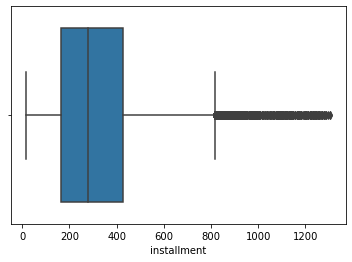

In [1104]:
sns.boxplot(df_new4.installment)


In [1107]:
print(np.percentile(df_new4.installment,95))

760.82


<AxesSubplot:xlabel='dti'>

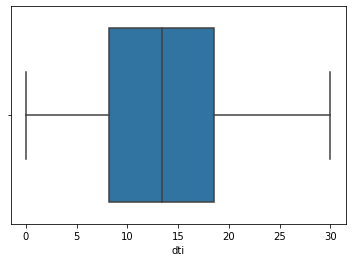

In [1105]:
sns.boxplot(df_new4.dti)

In [1116]:
y= df_new4.installment


In [1126]:
y.between(y.quantile(.05), y.quantile(.95)).value_counts()

True     34659
False     3845
Name: installment, dtype: int64

In [1127]:
df_new4.int_rate.between(df_new4.int_rate.quantile(.05), df_new4.int_rate.quantile(.95)).value_counts()

True     34792
False     3712
Name: int_rate, dtype: int64

In [1128]:
df_new4.loan_amnt.between(df_new4.loan_amnt.quantile(.05), df_new4.loan_amnt.quantile(.95)).value_counts()

True     35202
False     3302
Name: loan_amnt, dtype: int64

In [1129]:
df_new4.funded_amnt.between(df_new4.funded_amnt.quantile(.05), df_new4.loan_amnt.quantile(.95)).value_counts()

True     35341
False     3163
Name: funded_amnt, dtype: int64

In [1130]:

df_new4.funded_amnt_inv.between(df_new4.funded_amnt_inv.quantile(.05), df_new4.funded_amnt_inv.quantile(.95)).value_counts()

True     34739
False     3765
Name: funded_amnt_inv, dtype: int64

In [1135]:
# we will not be treating outliers for now as there is significant difference in the percentage of outliers across different columns and removing them might impact the overall analysis for different categories.

In [1138]:
df_new4.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 16.77,  7.51,  8.9 , 18.25,
        6.62, 19.91, 17.27, 14.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88, 20.11,
       16.02, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37,
       16.4 , 17.51,  7.66, 18.62, 10.74,  5.79,  6.92, 10.  ,  9.63,
       14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74,
       20.48,  6.91,

In [1145]:
df_new4.int_rate.value_counts().sort_index().sort_values(ascending=False).head(30)

10.99    913
11.49    786
7.51     786
13.49    747
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    482
10.37    467
12.69    451
6.03     447
8.49     433
5.79     410
12.99    408
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     384
9.63     378
10.59    358
9.91     357
5.99     346
14.27    342
7.14     341
6.99     336
Name: int_rate, dtype: int64

In [1146]:
df_new4.int_rate.value_counts().sort_index().sort_values(ascending=False).tail(30)

14.62    2
14.88    2
15.01    2
17.90    2
15.07    2
14.25    2
15.38    2
16.33    2
10.64    2
14.07    2
17.15    2
17.03    2
15.83    2
22.94    1
22.64    1
16.15    1
16.01    1
20.52    1
16.20    1
16.71    1
16.96    1
21.48    1
17.34    1
17.44    1
17.46    1
17.54    1
14.67    1
18.36    1
18.72    1
24.40    1
Name: int_rate, dtype: int64

In [1147]:
df_new4.int_rate.describe()

count    38504.000000
mean        11.928490
std          3.691065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64